### No 1

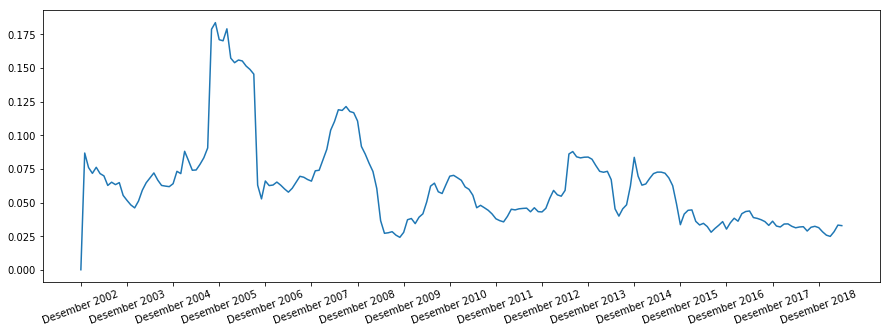

In [18]:
from numpy import linspace,arange
from pandas import read_excel
import matplotlib.pyplot as plt

df=read_excel (r'data_inflasi_indonesia.xlsx')
#bisa juga df['Month'].values
#tapi nanti jadinya array jadi ga bisa direverse
month=df['Month'].tolist()
month.reverse()
inflasi=df['Inflasi'].tolist()
inflasi.reverse()

t=arange(0,len(month))
x_labels=t[0::12]
plt.figure(figsize=(15,5))
plt.plot(t,inflasi)
plt.xticks(x_labels,month[0::12], rotation=20)
plt.show()

In [29]:
from statsmodels.tsa.stattools import adfuller

#result[0]: nilai test statistics
#result[1]: p-value
result = adfuller(inflasi, autolag='AIC')
result[1]

0.2540719273665154

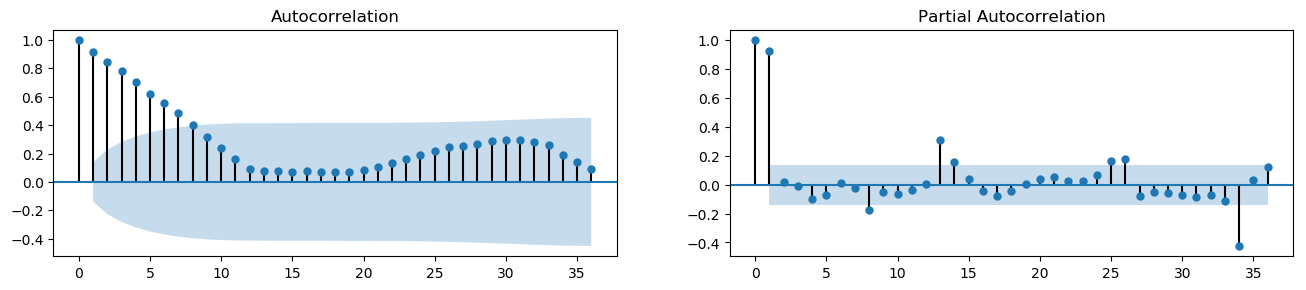

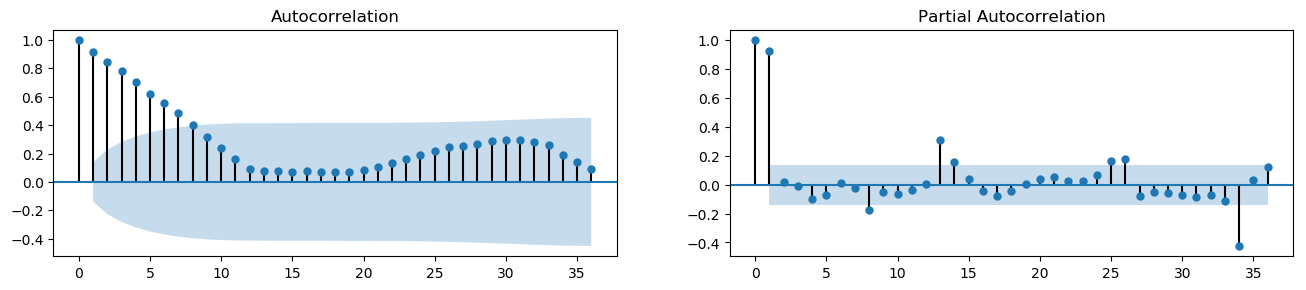

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(inflasi, lags=36, ax=axes[0])
plot_pacf(inflasi, lags=36, ax=axes[1])

In [49]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import Series
#kalau mau model arch garch
from arch import arch_model

model = ARIMA(inflasi,order=(2,1,2))
results_ARIMA = model.fit()
#results_ARIMA.summary()
forecast = results_ARIMA.forecast()[0]
#bisa juga pake predict
#forecast = results_ARIMA.predict(start=start_index, end=end_index)

#kalau model arch
#model = arch_model(inflasi, mean='Zero', vol='ARCH', p=15)

array([0.03413785])

### No 2

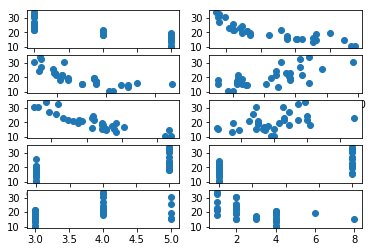

In [8]:
from numpy import linspace,arange
from pandas import read_excel
import matplotlib.pyplot as plt

df=read_excel (r'mtcars.xlsx')
mpg=df['mpg'].tolist()
cyl=df['cyl'].tolist()
disp=df['disp'].tolist()
hp=df['hp'].tolist()
drat=df['drat'].tolist()
wt=df['wt'].tolist()
qsec=df['qsec'].tolist()
vs=df['vs'].tolist()
am=df['am'].tolist()
gear=df['gear'].tolist()
carb=df['carb'].tolist()

plt.figure(0)
ax1 = plt.subplot2grid((5,2), (0,0))
ax2 = plt.subplot2grid((5,2), (0,1))
ax3 = plt.subplot2grid((5,2), (1,0))
ax4 = plt.subplot2grid((5,2), (1,1))
ax5 = plt.subplot2grid((5,2), (2,0))
ax6 = plt.subplot2grid((5,2), (2,1))
ax7 = plt.subplot2grid((5,2), (3,0))
ax8 = plt.subplot2grid((5,2), (3,1))
ax9 = plt.subplot2grid((5,2), (4,0))
ax10 = plt.subplot2grid((5,2), (4,1))

ax1.scatter(cyl, mpg)
ax2.scatter(disp, mpg)
ax3.scatter(hp, mpg)
ax4.scatter(drat, mpg)
ax5.scatter(wt, mpg)
ax6.scatter(qsec, mpg)
ax7.scatter(vs, mpg)
ax8.scatter(am, mpg)
ax9.scatter(gear, mpg)
ax10.scatter(carb, mpg)

plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X=df[['cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']]
Y=df['mpg']
#kalau mau menambah konstan:
X=sm.add_constant(X)

model=sm.OLS(Y,X)
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           3.79e-07
Time:                        16:57:09   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""